github 链接: https://github.com/Eacient/nn_from_scratch\

模型权重下载链接：https://drive.google.com/drive/folders/19vtEFeb4jn2UCD88y5Jx35BqFPrLssgr?usp=sharing

In [1]:
%load_ext autoreload
%autoreload 2
from google.colab import drive
drive.mount('/content/drive')
# %cd '/content/drive/MyDrive/nn_from_scratch/data'
# !wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
# !wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
# !wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
# !wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz
%cd '/content/drive/MyDrive/nn_from_scratch'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/nn_from_scratch


In [22]:
!pip3 install numdifftools
!pip3 install tqdm

### 任务要求

1. 至少包含模型、训练、测试和参数查找四个部分
2. 模型部分应允许自定义隐藏层大小、激活函数类型，支持通过反向传播计算给定损失的梯度
3. 训练部分应实现SGD优化器、学习率下降、交叉熵损失和L2正则化，并能根据验证集指标自动保存最优的模型权重
4. 参数查找环节要求调节学习率、隐藏层大小、正则化强度等超参数，观察并记录模型在不同超参数下的性能
5. 测试部分需支持导入训练好的模型，输出在测试集上的分类准确率
6. 可视化训练过程中在训练集和验证集上的loss曲线和验证集上的accuracy曲线
7. 报告中需包含对训练好的模型网络参数的可视化，并观察其中的模式

### 数据集

In [4]:
!python3 -m pytest -v -k 'parse_fashion_mnist'

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.4.4, pluggy-1.4.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content/drive/MyDrive/nn_from_scratch
plugins: anyio-3.7.1
collected 16 items / 15 deselected / 1 selected                                                    

tests/test_nn_scratch.py::test_parse_fashion_mnist PASSED                                    [100%]

================================= 1 passed, 15 deselected in 4.67s =================================


### 简化版模型

model

$$ z = W_2^TReLU(W_1^Tx) $$

loss

$$ \mathop{minimize}_{W1,W2} \frac1m \sum^{m}_{i=1} \ell_{softmax}(W_2^TReLU(W_1^Tx^{(i)}), y^{(i)}) $$

$$ \mathop{minimize}_{W1,W2} \ell_{softmax} (ReLU(XW_1)W_2, y) $$

forward

$$ Z_1 = ReLU(XW_1) $$

$$ Z = Z_1W_2 $$

backward

$$ G_{Z} = \frac1m (normalize(exp(Z)) - I_y)$$

$$ G_{W_2} = Z_1^TG_Z$$

$$ G_{Z_1} = G_ZW_2^T$$

$$ G_{W_1} = I(Z_1>0) \cdot X^TG_{Z_1} $$

In [ ]:
!python3 -m pytest -v -k 'nn_epoch_simple'

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.4.4, pluggy-1.4.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content/drive/MyDrive/nn_from_scratch
plugins: anyio-3.7.1
collected 16 items / 15 deselected / 1 selected                                                    

tests/test_nn_scratch.py::test_nn_epoch_simple PASSED                                        [100%]

================================= 1 passed, 15 deselected in 2.74s =================================


### 简化版训练

In [ ]:
import sys
sys.path.append("src/")
from nn_scratch import train_nn_simple, parse_fashion_mnist

X_tr, y_tr = parse_fashion_mnist("data/train-images-idx3-ubyte.gz",
                         "data/train-labels-idx1-ubyte.gz")
X_te, y_te = parse_fashion_mnist("data/t10k-images-idx3-ubyte.gz",
                         "data/t10k-labels-idx1-ubyte.gz")

train_nn_simple(X_tr, y_tr, X_te, y_te, epochs=10, lr=0.2, batch=1000)

| Epoch | Train Loss | Train Err | Test Loss | Test Err |
|     0 |    0.63312 |   0.23113 |   0.65544 |  0.24010 |
|     1 |    0.51740 |   0.18232 |   0.54353 |  0.19280 |
|     2 |    0.49964 |   0.17905 |   0.52692 |  0.18980 |
|     3 |    0.45572 |   0.16033 |   0.48656 |  0.17140 |
|     4 |    0.43819 |   0.15042 |   0.47051 |  0.16260 |
|     5 |    0.42657 |   0.15068 |   0.46213 |  0.16140 |
|     6 |    0.40216 |   0.14218 |   0.44028 |  0.15520 |
|     7 |    0.39918 |   0.14108 |   0.43864 |  0.15240 |
|     8 |    0.38594 |   0.13520 |   0.42745 |  0.14790 |
|     9 |    0.38231 |   0.13448 |   0.42599 |  0.14910 |


### 数据模块

In [ ]:
!python3 -m pytest -v -k 'dataloader'

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.4.4, pluggy-1.4.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content/drive/MyDrive/nn_from_scratch
plugins: anyio-3.7.1
collected 6 items / 3 deselected / 3 selected                                                      

tests/test_nn_scratch.py::test_dataloader_all PASSED                                         [ 33%]
tests/test_nn_scratch.py::test_dataloader_1 PASSED                                           [ 66%]
tests/test_nn_scratch.py::test_dataloader_32 PASSED                                          [100%]

================================= 3 passed, 3 deselected in 0.77s ==================================


### 模型模块

In [ ]:
!python3 -m pytest -v -k 'model'

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.4.4, pluggy-1.4.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content/drive/MyDrive/nn_from_scratch
plugins: anyio-3.7.1
collected 10 items / 6 deselected / 4 selected                                                     

tests/test_nn_scratch.py::test_model_relu PASSED                                             [ 25%]
tests/test_nn_scratch.py::test_model_tanh_backward PASSED                                    [ 50%]
tests/test_nn_scratch.py::test_model_sigmoid_backward PASSED                                 [ 75%]
tests/test_nn_scratch.py::test_model_state_dict PASSED                                       [100%]

================================= 4 passed, 6 deselected in 0.80s ==================================


### 训练模块

In [ ]:
!python3 -m pytest -v -k 'train'

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.4.4, pluggy-1.4.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content/drive/MyDrive/nn_from_scratch
plugins: anyio-3.7.1
collected 16 items / 10 deselected / 6 selected                                                    

tests/test_nn_scratch.py::test_train_sgd PASSED                                              [ 16%]
tests/test_nn_scratch.py::test_train_steplr PASSED                                           [ 33%]
tests/test_nn_scratch.py::test_train_logger PASSED                                           [ 50%]
tests/test_nn_scratch.py::test_train_nn_epoch PASSED                                         [ 66%]
tests/test_nn_scratch.py::test_train_split PASSED                                            [ 83%]
tests/test_nn_scratch.py::test_train_loss_acc PASSED                                         [100%]

=======================

| Epoch | Train Loss | Train Acc | Val  Loss | Val  Acc |
|     0 |    1.01016 |   0.72933 |   0.80276 |  0.70733 |
|     1 |    0.51894 |   0.81760 |   0.75253 |  0.70689 |
|     2 |    0.47099 |   0.83467 |   0.52608 |  0.80894 |
|     3 |    0.44626 |   0.84469 |   0.53358 |  0.80033 |
|     4 |    0.43260 |   0.85005 |   0.56184 |  0.80072 |
|     5 |    0.42467 |   0.85402 |   0.48044 |  0.82056 |
|     6 |    0.41870 |   0.85705 |   0.47892 |  0.81856 |
|     7 |    0.41440 |   0.85881 |   0.47671 |  0.82122 |
|     8 |    0.41136 |   0.86036 |   0.46373 |  0.82444 |
|     9 |    0.40954 |   0.86014 |   0.51795 |  0.79622 |
|    10 |    0.40875 |   0.86055 |   0.43396 |  0.84106 |
|    11 |    0.40617 |   0.86236 |   0.43687 |  0.83956 |
|    12 |    0.40522 |   0.86176 |   0.43314 |  0.83928 |
|    13 |    0.40451 |   0.86233 |   0.43128 |  0.84139 |
|    14 |    0.40375 |   0.86279 |   0.43355 |  0.84056 |


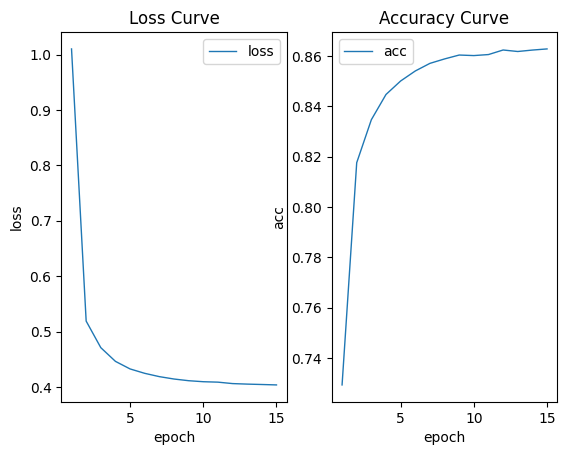

<Figure size 640x480 with 0 Axes>

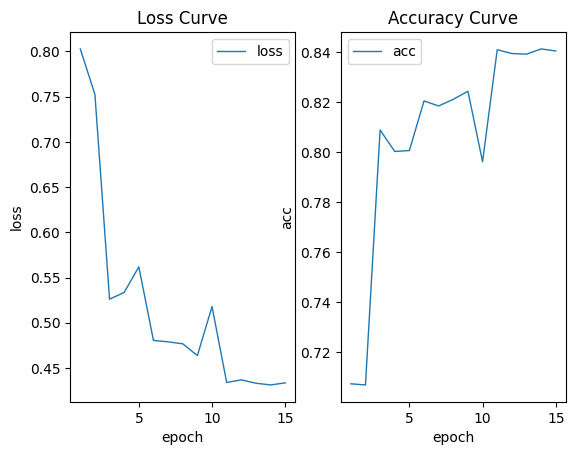

0.8413888888888896

<Figure size 640x480 with 0 Axes>

In [6]:
import os
import sys
sys.path.append('./src')
from nn_scratch import train_nn

data_dir = '/content/drive/MyDrive/nn_from_scratch/data'
save_dir = '/content/drive/MyDrive/nn_from_scratch/test_train'
os.makedirs(save_dir, exist_ok=True)

train_nn(data_dir, 256, 'relu', 15, 256, 0.1, 0.005, 1, 0.8, save_dir, plot=True)

### 参数搜索模块

In [23]:
from nn_scratch import param_search
data_dir = '/content/drive/MyDrive/nn_from_scratch/data'
root_dir = '/content/drive/MyDrive/nn_from_scratch/test_param_search'

param_search(data_dir, root_dir)

[00]: hidden_dim:256, act:relu, batch_size:100, lr:0.030, weight_decay:0.000, step_size:1, decay_rate:0.800


100%|██████████| 10/10 [00:47<00:00,  4.78s/it]


accuracy: 0.85667
saved to /content/drive/MyDrive/nn_from_scratch/test_param_search/256-relu-100-0.030-0.000-0.800

[01]: hidden_dim:256, act:relu, batch_size:100, lr:0.030, weight_decay:0.005, step_size:1, decay_rate:0.800


100%|██████████| 10/10 [00:40<00:00,  4.08s/it]


accuracy: 0.85367
saved to /content/drive/MyDrive/nn_from_scratch/test_param_search/256-relu-100-0.030-0.005-0.800

[02]: hidden_dim:256, act:relu, batch_size:100, lr:0.100, weight_decay:0.000, step_size:1, decay_rate:0.800


100%|██████████| 10/10 [00:36<00:00,  3.69s/it]


accuracy: 0.86789
saved to /content/drive/MyDrive/nn_from_scratch/test_param_search/256-relu-100-0.100-0.000-0.800

[03]: hidden_dim:256, act:relu, batch_size:100, lr:0.100, weight_decay:0.005, step_size:1, decay_rate:0.800


100%|██████████| 10/10 [00:43<00:00,  4.30s/it]


accuracy: 0.85461
saved to /content/drive/MyDrive/nn_from_scratch/test_param_search/256-relu-100-0.100-0.005-0.800

[04]: hidden_dim:256, act:relu, batch_size:1000, lr:0.030, weight_decay:0.000, step_size:1, decay_rate:0.800


100%|██████████| 10/10 [00:25<00:00,  2.58s/it]


accuracy: 0.76194
saved to /content/drive/MyDrive/nn_from_scratch/test_param_search/256-relu-1000-0.030-0.000-0.800

[05]: hidden_dim:256, act:relu, batch_size:1000, lr:0.030, weight_decay:0.005, step_size:1, decay_rate:0.800


100%|██████████| 10/10 [00:26<00:00,  2.63s/it]


accuracy: 0.76200
saved to /content/drive/MyDrive/nn_from_scratch/test_param_search/256-relu-1000-0.030-0.005-0.800

[06]: hidden_dim:256, act:relu, batch_size:1000, lr:0.100, weight_decay:0.000, step_size:1, decay_rate:0.800


100%|██████████| 10/10 [00:22<00:00,  2.29s/it]


accuracy: 0.78667
saved to /content/drive/MyDrive/nn_from_scratch/test_param_search/256-relu-1000-0.100-0.000-0.800

[07]: hidden_dim:256, act:relu, batch_size:1000, lr:0.100, weight_decay:0.005, step_size:1, decay_rate:0.800


100%|██████████| 10/10 [00:25<00:00,  2.55s/it]

accuracy: 0.78578
saved to /content/drive/MyDrive/nn_from_scratch/test_param_search/256-relu-1000-0.100-0.005-0.800



### 测试模块

test accuracy: 0.86740
W1:


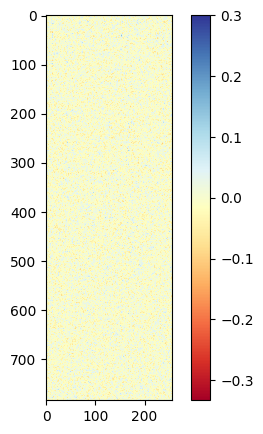

W2:


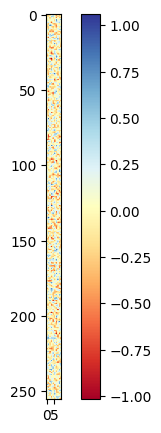

In [45]:
from nn_scratch import test_nn
data_dir = '/content/drive/MyDrive/nn_from_scratch/data'
model_path = '/content/drive/MyDrive/nn_from_scratch/test_param_search/256-relu-100-0.100-0.000-0.800/model.pth.npy'

test_nn(data_dir, model_path, 256, 'relu', -1)

第一个全连接层的参数非常稀疏，大多数都为0